a. Last name: Roy
b. The date: 09/05/2019
c. I applied Random Forest Classifier
d. AUC: 0.94
e. Dropped 'gender' and 'device type', and applied SMOTE to balance the data set

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing datafile
raw_train_data = pd.read_csv('data/train.csv')
raw_test_data = pd.read_csv('data/test.csv')

In [3]:
#First 5 rows of train data
raw_train_data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [4]:
#First 5 rows of test data
raw_test_data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [5]:
#Exploratory Data Analysis

In [6]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.3+ KB


In [13]:
#Making a list of the variables that contain missing values
raw_train_data.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [8]:
#Making a list of Unique values
raw_train_data.nunique()

age                             45
cost_of_ad                    9984
device_type                      5
gender                           2
in_initial_launch_location       2
income                        9268
n_drivers                        2
n_vehicles                       3
prior_ins_tenure                23
outcome                          2
dtype: int64

C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


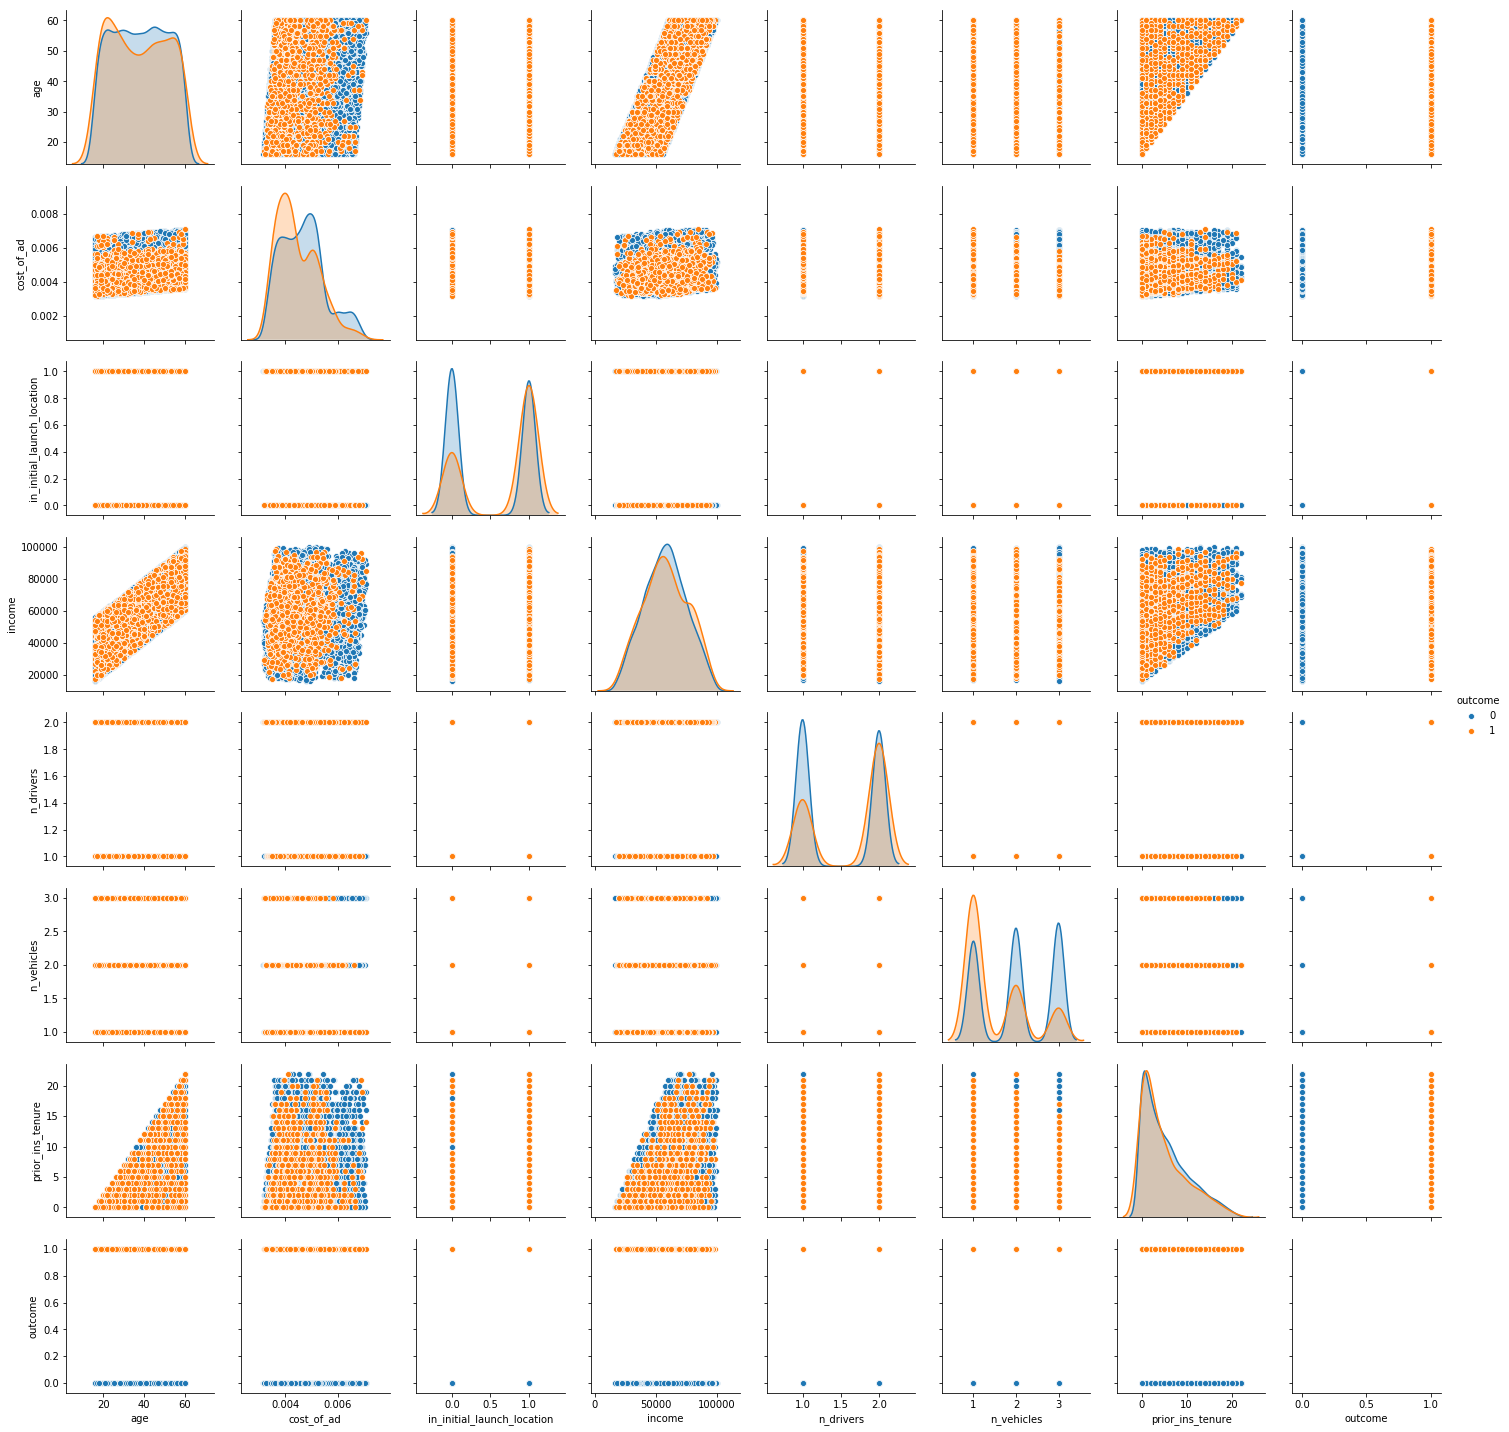

In [14]:
sns.pairplot(raw_train_data,hue='outcome')

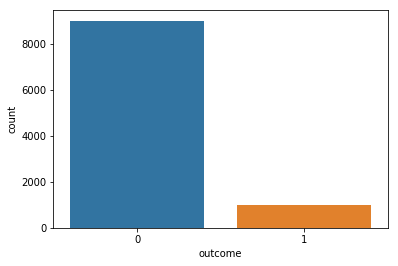

In [15]:
# Checking the balance of the train data
sns.countplot(x="outcome",data=raw_train_data)

In [16]:
raw_train_data.query('outcome==1').count()

age                           982
cost_of_ad                    982
device_type                   982
gender                        973
in_initial_launch_location    982
income                        982
n_drivers                     982
n_vehicles                    982
prior_ins_tenure              982
outcome                       982
dtype: int64

In [17]:
#Oversampling to balance the data set
from imblearn.over_sampling import SMOTE

# Resample the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
data_trainX, data_trainY = sm.fit_sample(raw_train_data.drop(['device_type','gender','outcome'], axis=1),raw_train_data['outcome'])

C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [18]:
raw_train_data.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome'],
      dtype='object')

In [19]:
#Converting in to dataframe
data_trainY = pd.DataFrame(data_trainY)
data_trainX = pd.DataFrame(data_trainX)
#adding header
data_trainY.rename(columns={0:'outcome'}, inplace=True)
data_trainX.rename(columns={0:'age',1:'cost_of_ad',2:'in_initial_launch_location',3:'income',4:'n_drivers',5:'n_vehicles',6:'prior_ins_tenure'},inplace=True)
#mearging both the dataframe
oversampled_train = pd.concat([data_trainY, data_trainX], axis=1)

In [20]:
oversampled_train.head()

,outcome,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,0,56.0,0.005737,0.0,62717.0,2.0,1.0,4.0
1,0,50.0,0.004733,0.0,64328.0,2.0,3.0,2.0
2,0,54.0,0.004129,0.0,83439.0,1.0,3.0,7.0
3,0,16.0,0.005117,0.0,30110.0,2.0,3.0,0.0
4,0,37.0,0.003635,0.0,76565.0,2.0,1.0,5.0


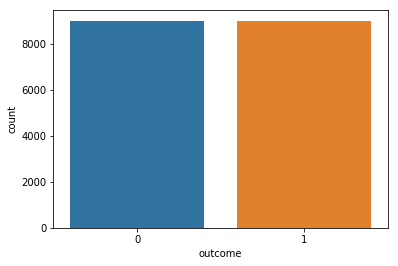

In [21]:
sns.countplot(x="outcome",data=oversampled_train)

In [22]:
oversampled_train.columns

Index(['outcome', 'age', 'cost_of_ad', 'in_initial_launch_location', 'income',
       'n_drivers', 'n_vehicles', 'prior_ins_tenure'],
      dtype='object')

In [23]:
feature_cols = ['age', 'cost_of_ad', 'in_initial_launch_location', 'income',
       'n_drivers', 'n_vehicles', 'prior_ins_tenure']

In [24]:
target_col = ['outcome']

In [25]:
X = oversampled_train[feature_cols]

In [26]:
X.head()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,56.0,0.005737,0.0,62717.0,2.0,1.0,4.0
1,50.0,0.004733,0.0,64328.0,2.0,3.0,2.0
2,54.0,0.004129,0.0,83439.0,1.0,3.0,7.0
3,16.0,0.005117,0.0,30110.0,2.0,3.0,0.0
4,37.0,0.003635,0.0,76565.0,2.0,1.0,5.0


In [27]:
y = oversampled_train[target_col]

In [28]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RF = RandomForestClassifier(n_estimators=125)

In [33]:
RF.fit(X_train,y_train)

C:\Users\imroy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
prediction_RF = RF.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
#Random Forests Evaluation
print(confusion_matrix(y_test,prediction_RF))

[[2572   96]
 [ 256 2487]]


In [37]:
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2668
           1       0.96      0.91      0.93      2743

    accuracy                           0.93      5411
   macro avg       0.94      0.94      0.93      5411
weighted avg       0.94      0.93      0.93      5411



In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_test,prediction_RF)

0.935344759264553

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# Application of 10-fold stratified cross-validation
CV_Score = cross_val_score(RF, X, y, cv=10)
print("Cross-validation scores: {}".format(CV_Score))
print("Average cross-validation score: {:.2f}".format(CV_Score.mean()))

C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Cross-validation scores: [0.6097561  0.94013304 0.9695122  0.97616408 0.98059867 0.97616408
 0.97727273 0.98115299 0.9672586  0.9772475 ]
Average cross-validation score: 0.94


In [43]:
final_predict = RF.predict(raw_test_data[feature_cols])

In [47]:
final_predict = pd.DataFrame(final_predict)

In [51]:
final_predict.rename(columns={0:'outcome'}, inplace=True)

In [71]:
#Final result on Test data
final_predict.head()

,outcome
0,0
1,0
2,0
3,0
4,0
